## Notes

#### What I'm Asking

- How does the victim's relationship to their murderer vary from state to state?
- How does it vary from region to region? MAYBE FOCUS ON REGION INSTEAD OF STATE?
- Compare relationship of murder to relationship status (census?)

#### Data to Find

- Find victim RELATIONSHIP data by STATE
- Compare to victim GENDER and AGE
- Dataframe of the max and min states for some of the data

#### Charts to Create

- Heat maps?
- Bar chart:
    - X-axis = state
    - Y-axis = number of that type
    - Colors = each relationship

#### Questions

- How many years? Just pick one?
- Select a handful of relationships? Do all? Edit them down to create broader categories?

#### Relationship Types
- Acquaintance
- Babysittee
- Boyfriend/girlfriend
- Child of boyfriend/girlfriend
- Child
- Common law spouse
- Employee
- Employer
- Friend
- Grandchild
- Grandparent
- Homosexual relationship
- In-law
- Neighbor
- Other family member
- Otherwise known
- Parent
- Relationship unknown
- Sibling
- Stepchild
- Spouse
- Stepparent
- Stepsibling
- Stranger
- Offender
- Ex-spouse

## Caveats

1. Not all states contributed full data for all years (ie some states might have started submitting data in later years; some states only had a handful of agencies that reported).
2. This is just looking at number of murders; not rates compared to the population of the states because of caveat 1.

## Set Up

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv

from pprint import pprint

# Import DATA.GOV API key
from api_keys import km_dg_key

# Output File (CSV)
output_data_file = "output_data/fbi_crime_data_state.csv"

## Get state abbreviations

In [3]:
#Pull all pages for the data for each state 
state_qry = "https://api.usa.gov/crime/fbi/sapi/api/states?api_key=" + km_dg_key 
state_results_1 = requests.get(state_qry, params={'page':0}).json()
state_results_2 = requests.get(state_qry, params={'page':1}).json()
state_results_3 = requests.get(state_qry, params={'page':2}).json()

#Make DFs for each page of data
sr1_df = pd.DataFrame(state_results_1['results'])
sr2_df = pd.DataFrame(state_results_2['results'])
sr3_df = pd.DataFrame(state_results_3['results'])

#Combine DFs of each page into one DF for all data
state_data = pd.concat([sr1_df, sr2_df, sr3_df])
state_data.head()

,region_code,state_abbr,state_fips_code,state_id,state_name
0,4,AK,2.0,1,Alaska
1,3,AL,1.0,2,Alabama
2,3,AR,5.0,3,Arkansas
3,99,AS,60.0,4,American Samoa
4,4,AZ,4.0,5,Arizona


## Get victim relationship data (relDF_base)

In [32]:
#This is the same series created before
states = (state_data.iloc[:,1]).astype(str)

#Open an empty list to initialize a dataframe
empty_list = []

relDF_base = pd.DataFrame(empty_list)

#Creating columns on list based on the returned data for one state
relDF_base["State"] = ""
relDF_base["Year"] = ""
relDF_base["Acquaintance"] = ""
relDF_base["Babysittee"] = ""
relDF_base["Boyfriend or Girlfriend"] = ""
relDF_base["Child of Boyfriend or Girlfriend"] = ""
relDF_base["Child"] = ""
relDF_base["Common Law Spouse"] = ""
relDF_base["Employee"] = ""
relDF_base["Employer"] = ""
relDF_base["Friend"] = ""
relDF_base["Grandchild"] = ""
relDF_base["Grandparent"] = ""
relDF_base["Homosexual Relationship"] = ""
relDF_base["In-Law"] = ""
relDF_base["Neighbor"] = ""
relDF_base["Other Family Member"] = ""
relDF_base["Otherwise Known"] = ""
relDF_base["Parent"] = ""
relDF_base["Unknown"] = ""
relDF_base["Sibling"] = ""
relDF_base["Stepchild"] = ""
relDF_base["Spouse"] = ""
relDF_base["Stepparent"] = ""
relDF_base["Stepsibling"] = ""
relDF_base["Stranger"] = ""
relDF_base["Offender"] = ""
relDF_base["Ex-Spouse"] = ""

#Loop through data to create the dataframe

for i in states:
    
    state = i 
    
    rel_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/states/"+ state +"/relationship?api_key=" + km_dg_key
    rel_response_state = requests.get(rel_query_url).json()
    
    for i in rel_response_state['results']:
        
        relDF_base = relDF_base.append({'State': state, 
                          'Year': i['data_year'], 
                          'Acquaintance': i['acquaintance'],
                          'Babysittee' : i['babysittee'],
                          'Boyfriend or Girlfriend' : i['boyfriend_girlfriend'],
                          'Child of Boyfriend or Girlfriend' : i['child_boyfriend_girlfriend'],
                          'Child' : i['child'],
                          'Common Law Spouse' : i['common_law_spouse'],
                          'Employee' : i['employee'],
                          'Employer' : i['employer'],
                          'Friend' : i['friend'],
                          'Grandchild' : i['grandchild'],
                          'Grandparent' : i['grandparent'],
                          'Homosexual Relationship' : i['homosexual_relationship'],
                          'In-Law' : i['in_law'],
                          'Neighbor' : i['neighbor'],
                          'Other Family Member' : i['other_family_member'],
                          'Otherwise Known' : i['otherwise_known'],
                          'Parent' : i['parent'],
                          'Unknown' : i['relationship_unknown'],
                          'Sibling' : i['sibling'],
                          'Stepchild' : i['stepchild'],
                          'Spouse' : i['spouse'],
                          'Stepparent' : i['stepparent'],
                          'Stepsibling' : i['stepsibling'],
                          'Stranger' : i['stranger'],
                          'Offender' : i['offender'],
                          'Ex-Spouse' : i['ex_spouse'],
                             },
                          ignore_index = True)

relDF_base.head()

,State,Year,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,...,Parent,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse
0,AL,1991,136,0,48,0,9,4,3,0,...,7,86,6,0,38,2,0,179,0,6
1,AL,1992,76,0,17,0,7,5,0,0,...,3,126,4,1,20,1,0,45,0,4
2,AL,2006,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
3,AL,2008,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
4,AL,2009,0,0,1,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


## Filter years to 2007-2017

In [164]:
#Change to numeric
relDF_base["Year"] = pd.to_numeric(relDF_base["Year"])
relDF_base["Acquaintance"] = pd.to_numeric(relDF_base["Acquaintance"])
relDF_base["Babysittee"] = pd.to_numeric(relDF_base["Babysittee"])
relDF_base["Boyfriend or Girlfriend"] = pd.to_numeric(relDF_base["Boyfriend or Girlfriend"])
relDF_base["Child of Boyfriend or Girlfriend"] = pd.to_numeric(relDF_base["Child of Boyfriend or Girlfriend"])
relDF_base["Child"] = pd.to_numeric(relDF_base["Child"])
relDF_base["Common Law Spouse"] = pd.to_numeric(relDF_base["Common Law Spouse"])
relDF_base["Employee"] = pd.to_numeric(relDF_base["Employee"])
relDF_base["Employer"] = pd.to_numeric(relDF_base["Employer"])
relDF_base["Friend"] = pd.to_numeric(relDF_base["Friend"])
relDF_base["Grandchild"] = pd.to_numeric(relDF_base["Grandchild"])
relDF_base["Grandparent"] = pd.to_numeric(relDF_base["Grandparent"])
relDF_base["Homosexual Relationship"] = pd.to_numeric(relDF_base["Homosexual Relationship"])
relDF_base["In-Law"] = pd.to_numeric(relDF_base["In-Law"])
relDF_base["Neighbor"] = pd.to_numeric(relDF_base["Neighbor"])
relDF_base["Other Family Member"] = pd.to_numeric(relDF_base["Other Family Member"])
relDF_base["Otherwise Known"] = pd.to_numeric(relDF_base["Otherwise Known"])
relDF_base["Parent"] = pd.to_numeric(relDF_base["Parent"])
relDF_base["Unknown"] = pd.to_numeric(relDF_base["Unknown"])
relDF_base["Sibling"] = pd.to_numeric(relDF_base["Sibling"])
relDF_base["Stepchild"] = pd.to_numeric(relDF_base["Stepchild"])
relDF_base["Spouse"] = pd.to_numeric(relDF_base["Spouse"])
relDF_base["Stepparent"] = pd.to_numeric(relDF_base["Stepparent"])
relDF_base["Stepsibling"] = pd.to_numeric(relDF_base["Stepsibling"])
relDF_base["Stranger"] = pd.to_numeric(relDF_base["Stranger"])
relDF_base["Offender"] = pd.to_numeric(relDF_base["Offender"])
relDF_base["Ex-Spouse"] = pd.to_numeric(relDF_base["Ex-Spouse"])

#Filter to years 2007-2017 - ORIGINAL
##relDF_base["Year"] = pd.to_numeric(relDF_base["Year"])
relDF = relDF_base.loc[(relDF_base["Year"] >= 2007) & (relDF_base["Year"] <= 2017), :]

#Reset the index
relDF = relDF.reset_index()
relDF = relDF.drop(axis=1, columns=["index"])
    
#Check dataframe:
relDF.head(10)

,State,Year,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,...,Parent,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse
0,AL,2008,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,AL,2009,0,0,1,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,AL,2010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AL,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,AL,2013,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,AL,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,AL,2015,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,AL,2016,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,0
8,AL,2017,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,AR,2007,22,0,6,0,1,0,0,0,...,3,62,4,0,7,1,0,13,0,0


## Drop State and Year and Convert All Columns to Integers (relOnlyDF)

In [165]:
#Pull out the State and Year columns to put back into the dataframe later
State = relDF["State"]
Year = relDF["Year"]

#Drop the columns that are not wanted while finding Max 
relOnlyDF = relDF.drop(axis=1, columns=["State", "Year"])

relOnlyDF.head()

,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,Friend,Grandchild,...,Parent,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Find Max Value & ID Column for Each State/Year (relMaxAllRowsDF)

In [137]:
#You can do the searches for ID and Max separately because they will be in the same order/use the same index for 
#combining later.

#Find the column label that corresponds to the column with the max value for that row
relSeriesID = relOnlyDF.idxmax(axis=1, skipna=True)

#Find the max value for each row
relSeriesMax = relOnlyDF.max(axis=1, skipna=True)

#Combine state, year, and maximum columns into a new DF
relMaxAllRowsDFSetup = pd.DataFrame([State, Year, relSeriesID, relSeriesMax]).T

#Rename columns
relMaxAllRowsDF = relMaxAllRowsDFSetup.rename(columns = {"Unnamed 0": "Relationship",
                                                         "Unnamed 1": "Number of Murders"})

relMaxAllRowsDF.head()

,State,Year,Relationship,Number of Murders
0,AL,2008,Stranger,2
1,AL,2009,Boyfriend or Girlfriend,1
2,AL,2010,Otherwise Known,3
3,AL,2012,Otherwise Known,1
4,AL,2013,Acquaintance,1


## Max Values Excluding Unknown (relMaxNoUnknownDF)

In [166]:
#Reset relOnlyDF, dropping the Unknown column:
relOnlyDF = relDF.drop(axis=1, columns=["State", "Year", "Unknown"])

#Find the column label that corresponds to the column with the max value for that row
relSeriesID = relOnlyDF.idxmax(axis=1, skipna=True)

#Find the max value for each row
relSeriesMax = relOnlyDF.max(axis=1, skipna=True)

#Combine state, year, and maximum columns into a new DF
relMaxNoUnknownDFSetup = pd.DataFrame([State, Year, relSeriesID, relSeriesMax]).T

#Rename columns
relMaxNoUnknownDF = relMaxNoUnknownDFSetup.rename(columns = {"Unnamed 0": "Relationship",
                                                             "Unnamed 1": "Number of Murders"})

relMaxNoUnknownDF.head()

,State,Year,Relationship,Number of Murders
0,AL,2008,Stranger,2
1,AL,2009,Boyfriend or Girlfriend,1
2,AL,2010,Otherwise Known,3
3,AL,2012,Otherwise Known,1
4,AL,2013,Acquaintance,1


## Max Values Excluding Unknown for 2017 (data2017)

In [258]:
#2017 max data
max2017 = relMaxNoUnknownDF.loc[relMaxNoUnknownDF["Year"] == 2017, :]
max2017dropYear = max2017.drop(axis=1, columns=["Year"]) 
max2017group = max2017dropYear.groupby(["Relationship"]).sum()
max2017group

,State,Number of Murders
Relationship,,
Acquaintance,ALARCOCTIAIDILKSKYLAMAMDMEMIMNMOMSMTNENHOHOKOR...,1154
Boyfriend or Girlfriend,VT,3
Friend,IN,5
Otherwise Known,DEND,18
Stranger,AZPAWI,117


<font color=blue>

## STACKED BAR: ALL RELATIONSHIPS 2007-2017 BY STATE

#### Grouped By State, Sum Years for Each State, Add Total Column

In [248]:
#Group by state:
grouprelDFState = relDF.groupby(["State"]).sum()

#Drop year and "unknown":
relStatePercDF = grouprelDFState.drop(axis=1, columns=["Year", "Unknown"])

col_list= list(relStatePercDF)
col_list

relStatePercDF['Total Murders'] = relStatePercDF[col_list].sum(axis=1)
relStatePercDF.head()

,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,Friend,Grandchild,...,Parent,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse,Total Murders
State,,,,,,,,,,,,,,,,,,,,,
AL,4,0,2,0,1,0,0,0,0,0,...,1,1,0,1,0,0,7,0,0,22
AR,318,2,88,9,40,3,0,2,47,0,...,22,23,5,79,7,1,120,10,7,983
AZ,23,0,13,0,28,0,0,1,6,0,...,3,2,1,8,1,0,31,1,3,137
CO,376,7,101,13,100,10,2,4,67,3,...,47,17,13,118,8,0,366,10,14,1475
CT,129,4,39,4,23,3,2,0,20,3,...,16,4,2,26,0,0,108,6,3,480


#### Change DF to Percentages (relStatePercDF)

In [249]:
relStatePercDF["Acquaintance"] = (relStatePercDF["Acquaintance"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Babysittee"] = (relStatePercDF["Babysittee"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Boyfriend or Girlfriend"] = (relStatePercDF["Boyfriend or Girlfriend"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Child of Boyfriend or Girlfriend"] = (relStatePercDF["Child of Boyfriend or Girlfriend"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Child"] = (relStatePercDF["Child"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Common Law Spouse"] = (relStatePercDF["Common Law Spouse"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Employee"] = (relStatePercDF["Employee"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Employer"] = (relStatePercDF["Employer"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Friend"] = (relStatePercDF["Friend"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Grandchild"] = (relStatePercDF["Grandchild"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Grandparent"] = (relStatePercDF["Grandparent"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Homosexual Relationship"] = (relStatePercDF["Homosexual Relationship"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["In-Law"] = (relStatePercDF["In-Law"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Neighbor"] = (relStatePercDF["Neighbor"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Other Family Member"] = (relStatePercDF["Other Family Member"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Otherwise Known"] = (relStatePercDF["Otherwise Known"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Parent"] = (relStatePercDF["Parent"] / relStatePercDF["Total Murders"]) * 100
#relStatePercDF["Unknown"] = (relStatePercDF["Unknown"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Sibling"] = (relStatePercDF["Sibling"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Stepchild"] = (relStatePercDF["Stepchild"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Spouse"] = (relStatePercDF["Spouse"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Stepparent"] = (relStatePercDF["Stepparent"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Stepsibling"] = (relStatePercDF["Stepsibling"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Stranger"] = (relStatePercDF["Stranger"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Offender"] = (relStatePercDF["Offender"] / relStatePercDF["Total Murders"]) * 100
relStatePercDF["Ex-Spouse"] = (relStatePercDF["Ex-Spouse"] / relStatePercDF["Total Murders"]) * 100

relStatePercDF.head()

,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,Friend,Grandchild,...,Parent,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse,Total Murders
State,,,,,,,,,,,,,,,,,,,,,
AL,18.181818,0.000000,9.090909,0.000000,4.545455,0.000000,0.000000,0.000000,0.000000,0.00000,...,4.545455,4.545455,0.000000,4.545455,0.000000,0.000000,31.818182,0.000000,0.000000,22
AR,32.349949,0.203459,8.952187,0.915565,4.069176,0.305188,0.000000,0.203459,4.781282,0.00000,...,2.238047,2.339776,0.508647,8.036623,0.712106,0.101729,12.207528,1.017294,0.712106,983
AZ,16.788321,0.000000,9.489051,0.000000,20.437956,0.000000,0.000000,0.729927,4.379562,0.00000,...,2.189781,1.459854,0.729927,5.839416,0.729927,0.000000,22.627737,0.729927,2.189781,137
CO,25.491525,0.474576,6.847458,0.881356,6.779661,0.677966,0.135593,0.271186,4.542373,0.20339,...,3.186441,1.152542,0.881356,8.000000,0.542373,0.000000,24.813559,0.677966,0.949153,1475
CT,26.875000,0.833333,8.125000,0.833333,4.791667,0.625000,0.416667,0.000000,4.166667,0.62500,...,3.333333,0.833333,0.416667,5.416667,0.000000,0.000000,22.500000,1.250000,0.625000,480


#### Stacked Bar Chart

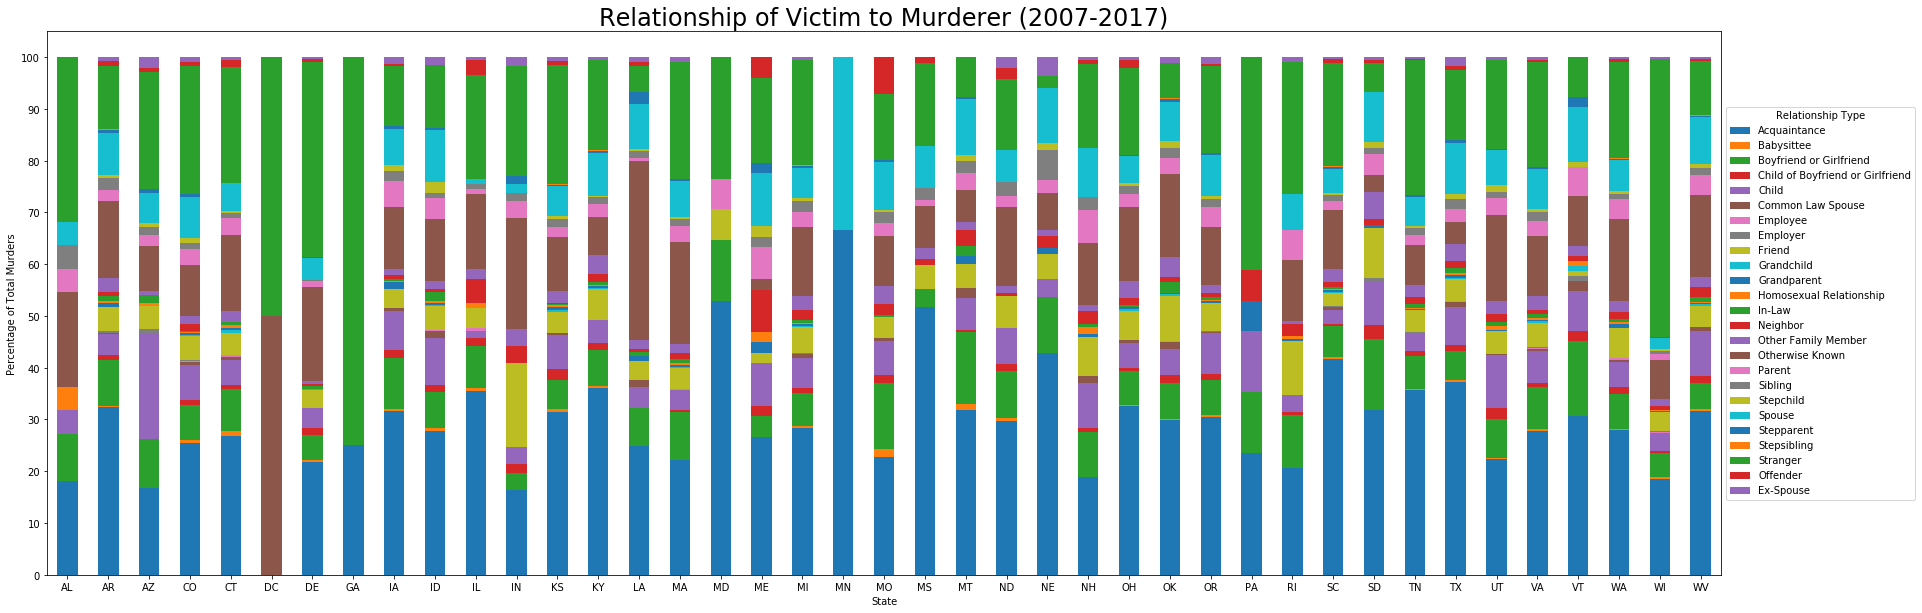

In [250]:
#Drop the Total Murders column so it isn't included in the chart
relStatePercDFNoTotal = relStatePercDF.drop(axis=1, columns=["Total Murders"])

#Plot stacked bar chart
relStatePercDFNoTotal.plot(kind='bar',
                           stacked=True, 
                           figsize=(30,10),
                           rot=0
                           )
plt.title("Relationship of Victim to Murderer (2007-2017)", fontsize=24, ha='center')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Relationship Type")
plt.xlabel("State")
plt.ylabel("Percentage of Total Murders")
plt.yticks(np.arange(0, 101, 10))

#Save image
plt.savefig("Image_RelVictimToMurderAllYears.png")

<font color=blue>

## LINE CHART: TOTAL MURDERS 2007-2017
- X-axis: year
- Y-axis: number of murders
- Line: type of murder

#### Created DF (groupedYear)

In [260]:
groupedYear = relDF.groupby(["Year"]).sum()
groupedYear

,Acquaintance,Babysittee,Boyfriend or Girlfriend,Child of Boyfriend or Girlfriend,Child,Common Law Spouse,Employee,Employer,Friend,Grandchild,...,Parent,Unknown,Sibling,Stepchild,Spouse,Stepparent,Stepsibling,Stranger,Offender,Ex-Spouse
Year,,,,,,,,,,,,,,,,,,,,,
2007,833,10,182,21,133,8,2,6,86,7,...,49,1805,39,20,154,12,1,867,12,21
2008,836,11,173,27,148,16,1,1,113,4,...,61,1465,39,17,153,10,5,670,9,21
2009,910,6,177,22,163,13,3,3,95,4,...,66,1674,45,26,202,9,1,572,18,16
2010,868,7,209,32,124,16,1,6,114,8,...,88,1575,45,24,199,9,3,555,19,16
2011,901,12,204,31,148,19,1,3,124,8,...,70,1625,42,13,183,16,4,565,19,22
2012,936,8,205,27,141,12,2,5,134,3,...,71,1781,38,11,171,13,0,625,20,16
2013,940,10,194,25,147,9,0,1,147,9,...,80,1618,47,10,197,10,2,553,10,14
2014,907,9,198,25,183,14,5,1,130,8,...,95,1702,37,19,192,10,0,573,13,15
2015,1007,13,241,37,187,18,3,5,166,0,...,67,2022,48,13,205,13,5,609,27,15


#### Create Line Chart

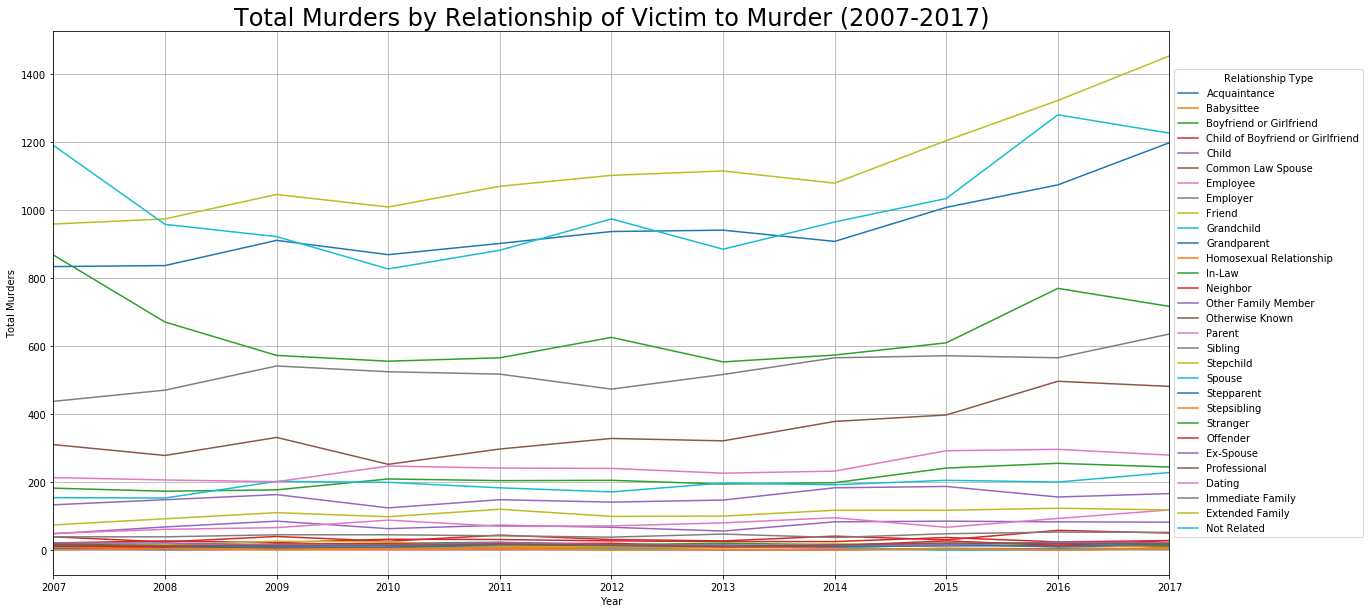

In [279]:
groupedYear.plot.line(figsize=(20,10))

plt.title("Total Murders by Relationship of Victim to Murder (2007-2017)", fontsize=24, ha='center')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Relationship Type")
plt.xlabel("Year")
plt.ylabel("Total Murders")
plt.xticks(np.arange(2007, 2018, 1.0))
plt.grid()

<font color=blue>

## LINE CHART: TOTAL MURDERS 2007-2017 (consolidated categories)
- X-axis: year
- Y-axis: number of murders
- Line: type of murder

In [272]:
groupedYear["Friend"] = groupedYear["Acquaintance"] + \
                        groupedYear["Friend"] + \
                        groupedYear["Neighbor"]
                        
groupedYear["Professional"] = groupedYear["Babysittee"] + \
                              groupedYear["Employee"] + \
                              groupedYear["Employer"]
                        
groupedYear["Dating"] = groupedYear["Boyfriend or Girlfriend"] + \
                        groupedYear["Child of Boyfriend or Girlfriend"] + \
                        groupedYear["Homosexual Relationship"]

groupedYear["Immediate Family"] = groupedYear["Child"] + \
                                  groupedYear["Common Law Spouse"] + \
                                  groupedYear["Parent"] + \
                                  groupedYear["Sibling"] + \
                                  groupedYear["Stepchild"] + \
                                  groupedYear["Spouse"] + \
                                  groupedYear["Stepparent"] + \
                                  groupedYear["Stepsibling"] + \
                                  groupedYear["Ex-Spouse"]

groupedYear["Extended Family"] = groupedYear["Grandchild"] + \
                          groupedYear["Grandparent"] + \
                          groupedYear["In-Law"] + \
                          groupedYear["Other Family Member"]

groupedYear["Not Related"] = groupedYear["Otherwise Known"] + \
                             groupedYear["Stranger"] + \
                             groupedYear["Offender"]

groupedYearConsolidated = groupedYear[["Immediate Family", 
                                       "Extended Family", 
                                       "Dating", 
                                       "Friend", 
                                       "Professional",
                                       "Not Related"]]

groupedYearConsolidated.head()

,Immediate Family,Extended Family,Dating,Friend,Professional,Not Related
Year,,,,,,
2007,437,74,213,958,18,1189
2008,470,92,206,973,13,957
2009,541,110,201,1045,12,921
2010,524,98,247,1008,14,826
2011,517,120,241,1069,16,881


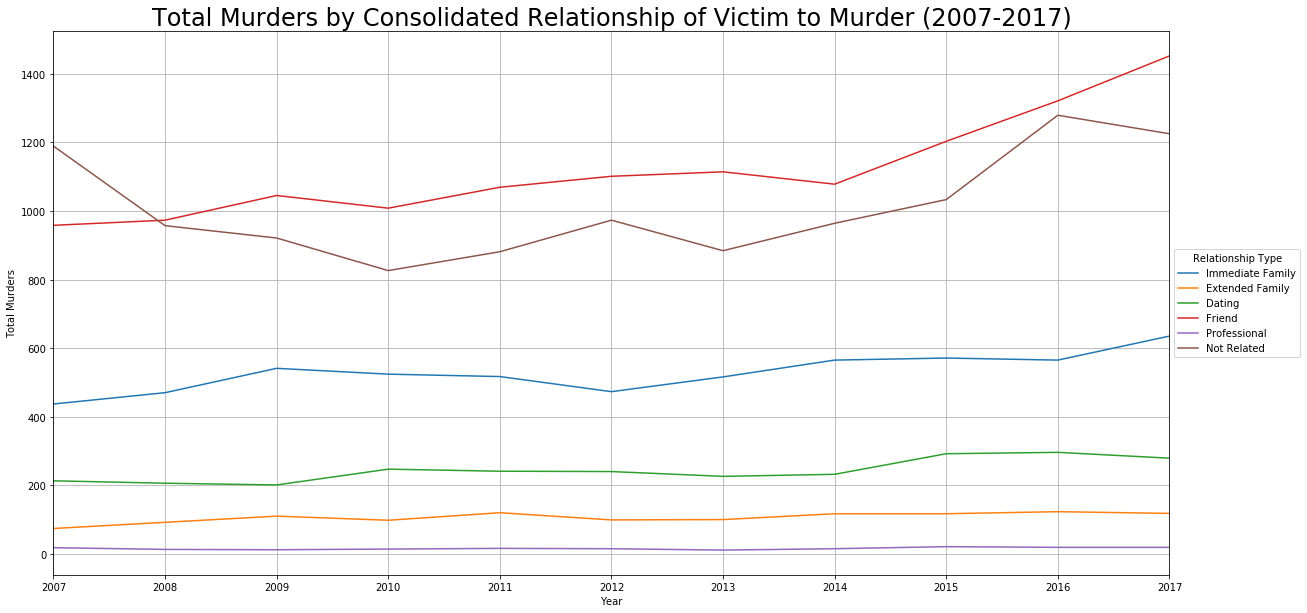

In [280]:
groupedYearConsolidated.plot.line(figsize=(20,10))

plt.title("Total Murders by Consolidated Relationship of Victim to Murder (2007-2017)", fontsize=24, ha='center')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Relationship Type")
plt.xlabel("Year")
plt.ylabel("Total Murders")
plt.xticks(np.arange(2007, 2018, 1.0))
plt.grid()